In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import tensorflow as tf
from torch import nn, optim
import torch
import math
from torch.utils.data import Dataset, DataLoader

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train=pd.read_csv("/content/drive/My Drive/Hourly-train.csv")
df_test=pd.read_csv("/content/drive/My Drive/Hourly-test.csv")

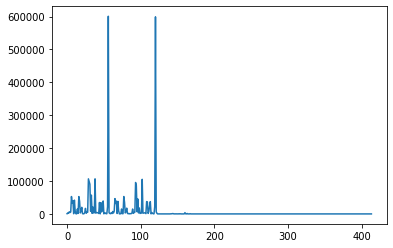

In [ ]:
df_train["V2"].plot()

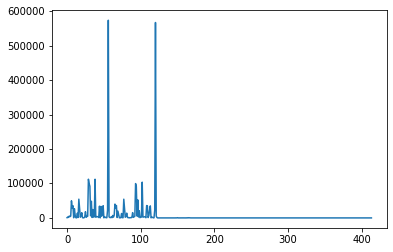

In [ ]:
df_test["V2"].plot()

In [ ]:
df_train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
       ... 
V957    169
V958    169
V959    169
V960    169
V961    169
Length: 961, dtype: int64

In [ ]:
df_test.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
V41    0
V42    0
V43    0
V44    0
V45    0
V46    0
V47    0
V48    0
V49    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer 
mean_imputer =SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
df=df_train.drop(['V1'], axis = 1) 
df1=df_train.drop(['V1'], axis = 1) 
df1_test=df_test.drop(['V1'], axis = 1) 
df_test=df_test.iloc[:,1:]

In [ ]:
df.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,...,V922,V923,V924,V925,V926,V927,V928,V929,V930,V931,V932,V933,V934,V935,V936,V937,V938,V939,V940,V941,V942,V943,V944,V945,V946,V947,V948,V949,V950,V951,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
0,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,370.0,383.0,397.0,420.0,455.0,493.0,554.0,610.0,666.0,715.0,755.0,778.0,794.0,806.0,808.0,776.0,723.0,709.0,660.0,585.0,527.0,462.0,437.0,413.0,407.0,404.0,420.0,441.0,471.0,526.0,571.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,1713.0,1724.0,1798.0,1891.0,2037.0,2102.0,2163.0,2269.0,2404.0,2515.0,2621.0,2745.0,2816.0,2938.0,3022.0,2976.0,2892.0,2784.0,2725.0,2530.0,2211.0,1995.0,1833.0,1768.0,1712.0,1707.0,1762.0,1880.0,1995.0,2134.0,2227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,1108.0,1058.0,1024.0,1031.0,1091.0,1208.0,1337.0,1435.0,1515.0,1593.0,1667.0,1753.0,1768.0,1823.0,1813.0,1842.0,1838.0,1800.0,1761.0,1670.0,1609.0,1467.0,1309.0,1189.0,1102.0,1054.0,1017.0,1014.0,1063.0,1187.0,1314.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,4227.0,4016.0,3879.0,3821.0,3823.0,3960.0,4169.0,4377.0,4597.0,4864.0,5183.0,5440.0,5707.0,5937.0,6089.0,6097.0,6018.0,5783.0,5655.0,5581.0,5320.0,4909.0,4509.0,4189.0,3964.0,3794.0,3680.0,3682.0,3693.0,3851.0,4108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,2275.0,2104.0,1988.0,1958.0,2006.0,2076.0,2209.0,2372.0,2599.0,2880.0,3127.0,3297.0,3506.0,3667.0,3752.0,3842.0,3851.0,3728.0,3578.0,3421.0,3252.0,2910.0,2559.0,2293.0,2104.0,1974.0,1893.0,1896.0,1970.0,2053.0,2209.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
0,619.0,565.0,532.0,495.0,481.0,467.0,473.0,488.0,501.0,534.0,576.0,639.0,712.0,772.0,830.0,880.0,893.0,896.0,891.0,854.0,803.0,769.0,751.0,701.0,635.0,572.0,532.0,493.0,477.0,468.0,464.0,477.0,492.0,519.0,568.0,624.0,696.0,761.0,812.0,836.0,838.0,829.0,807.0,785.0,756.0,719.0,703.0,659.0
1,2771.0,2396.0,2189.0,1984.0,1872.0,1843.0,1828.0,1872.0,1952.0,2069.0,2228.0,2419.0,2640.0,2850.0,3001.0,3129.0,3244.0,3295.0,3322.0,3322.0,3286.0,3092.0,2936.0,2825.0,2519.0,2197.0,1997.0,1775.0,1725.0,1630.0,1644.0,1722.0,1808.0,1961.0,2154.0,2355.0,2605.0,2821.0,3018.0,3206.0,3356.0,3499.0,3550.0,3558.0,3488.0,3224.0,3054.0,2918.0
2,1455.0,1376.0,1235.0,1101.0,1003.0,943.0,905.0,886.0,910.0,970.0,1071.0,1170.0,1225.0,1306.0,1373.0,1442.0,1542.0,1611.0,1673.0,1711.0,1754.0,1757.0,1735.0,1667.0,1585.0,1473.0,1317.0,1177.0,1060.0,1000.0,951.0,917.0,924.0,979.0,1073.0,1195.0,1281.0,1371.0,1457.0,1529.0,1627.0,1701.0,1754.0,1791.0,1819.0,1791.0,1758.0,1679.0
3,5327.0,5051.0,4683.0,4319.0,4049.0,3847.0,3712.0,3639.0,3652.0,3758.0,3857.0,4082.0,4363.0,4631.0,4915.0,5201.0,5442.0,5738.0,5993.0,6195.0,6290.0,6284.0,6126.0,5968.0,5818.0,5516.0,5074.0,4658.0,4337.0,4106.0,3922.0,3804.0,3794.0,3853.0,3993.0,4284.0,4575.0,4925.0,5337.0,5675.0,5926.0,6159.0,6313.0,6072.0,5612.0,5220.0,4895.0,4793.0
4,3823.0,3501.0,3039.0,2613.0,2312.0,2079.0,1938.0,1839.0,1821.0,1877.0,1951.0,2062.0,2182.0,2353.0,2562.0,2826.0,3100.0,3431.0,3689.0,3900.0,4049.0,4056.0,3931.0,3682.0,3471.0,3200.0,2810.0,2461.0,2199.0,2004.0,1873.0,1791.0,1788.0,1853.0,1926.0,1996.0,2067.0,2174.0,2345.0,2529.0,2737.0,3028.0,3292.0,3453.0,3574.0,3522.0,3338.0,3041.0


In [ ]:
mean_imputer = mean_imputer.fit(df)
imputed_df = mean_imputer.transform(df)

In [ ]:
mean_imputer = mean_imputer.fit(df_test)
imputed_df_test = mean_imputer.transform(df_test)

In [ ]:
print(np.isnan(imputed_df).sum())
print(np.isnan(imputed_df_test).sum())

0
0


In [ ]:
print(imputed_df.shape)
imputed_df_test.shape

(414, 960)


(414, 48)

In [ ]:
for i in range(0,960):
    imputed_df[:,i]=imputed_df[:,i]/np.mean(imputed_df[:,i])

In [ ]:
imputed_df[:,1]

array([7.78888927e-02, 3.97419435e-01, 2.40046656e-01, 8.40562043e-01,
       5.71140907e-01, 7.30640346e-01, 6.88147037e+00, 4.12279466e+00,
       5.08789918e+00, 6.80530939e-02, 5.46883701e+00, 1.22349361e+00,
       7.72243117e-02, 3.21657202e-02, 1.87784006e+00, 1.90203081e-01,
       6.71054014e+00, 4.98688287e+00, 3.83197402e-01, 1.18109334e+00,
       2.57684635e+00, 1.04073384e-01, 4.22673513e-02, 6.40656079e-02,
       4.90062026e-01, 2.20906723e+00, 2.53072443e-01, 6.44244817e-01,
       6.42383990e-01, 1.38252784e+01, 1.26852562e+01, 1.16454528e+01,
       1.08207078e+00, 7.54645012e+00, 2.32736265e-01, 2.78299938e+00,
       4.02071502e-01, 4.86207456e-01, 1.38155756e+01, 3.16739302e-01,
       5.57849287e-01, 5.04815724e-01, 4.39420954e-01, 1.72126478e-01,
       4.52287242e+00, 2.56528264e-02, 4.44498353e+00, 7.83142245e-01,
       2.62549368e+00, 5.07115174e+00, 3.49569604e-02, 4.69061267e-01,
       3.17270967e-01, 8.05472166e-02, 8.16105462e-02, 2.83403920e+00,
      

In [ ]:
for i in range(0,48):
    imputed_df_test[:,i]=imputed_df_test[:,i]/np.mean(imputed_df_test[:,i])

In [ ]:
imputed_df_test[:,1]

array([8.33655965e-02, 3.53529149e-01, 2.03028426e-01, 7.45273677e-01,
       5.16571599e-01, 7.79947864e-01, 7.10850326e+00, 3.98871180e+00,
       4.81823638e+00, 6.66924772e-02, 3.79306086e+00, 1.09349104e+00,
       7.71685079e-02, 2.89197467e-02, 1.86694671e+00, 1.71305235e-01,
       7.34236958e+00, 3.78937212e+00, 2.80492033e-01, 7.89686146e-01,
       2.02482492e+00, 9.88583179e-02, 3.14280921e-02, 5.71017448e-02,
       3.64890478e-01, 2.55083970e+00, 2.49949240e-01, 6.22217204e-01,
       6.65596824e-01, 1.54694086e+01, 1.34496004e+01, 1.24304744e+01,
       8.65084057e-01, 6.73313675e+00, 1.92552395e-01, 3.31470465e+00,
       3.03657341e-01, 5.00046029e-01, 1.54598179e+01, 2.64851762e-01,
       5.75001291e-01, 4.83077810e-01, 4.68027738e-01, 1.66878743e-01,
       4.68499897e+00, 1.90339149e-02, 4.60163338e+00, 6.97467566e-01,
       2.31903908e+00, 4.80569465e+00, 4.89865098e-02, 3.27412847e-01,
       2.76803290e-01, 7.82013560e-02, 8.70543397e-02, 3.10577423e+00,
      

In [ ]:
print(np.argwhere(imputed_df == 0))
np.argwhere(imputed_df_test == 0)

[]


array([], shape=(0, 2), dtype=int64)

In [ ]:
df=np.log(imputed_df)
df_test=np.log(imputed_df_test)

In [ ]:
print(df_test.shape)
df.shape


(414, 48)


(414, 960)

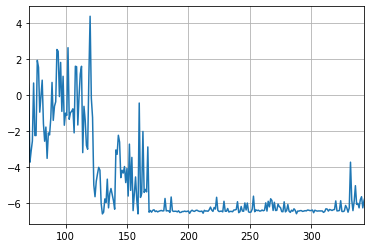

In [ ]:
fig, ax = plt.subplots()  
ax.plot(df[:,1])     
ax.xaxis.zoom(2)  
ax.grid()  
plt.show()

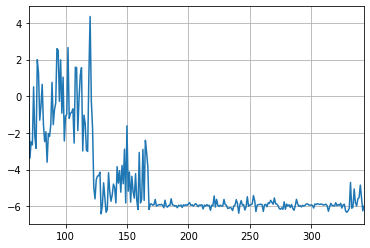

In [ ]:
fig, ax = plt.subplots()  
ax.plot(df_test[:,1])     
ax.xaxis.zoom(2)  
ax.grid()  
plt.show()

In [ ]:

de=pd.DataFrame(data=df[0:,0:],columns=df1.columns)
de_test=pd.DataFrame(data=df_test[0:,0:],columns=df1_test.columns)

In [ ]:
de.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,...,V922,V923,V924,V925,V926,V927,V928,V929,V930,V931,V932,V933,V934,V935,V936,V937,V938,V939,V940,V941,V942,V943,V944,V945,V946,V947,V948,V949,V950,V951,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
0,-2.544738,-2.552472,-2.525145,-2.530723,-2.549896,-2.624176,-2.612906,-2.629978,-2.628517,-2.633718,-2.607701,-2.603331,-2.594935,-2.561929,-2.526980,-2.466997,-2.423795,-2.380454,-2.340677,-2.308540,-2.295050,-2.285548,-2.269755,-2.251037,-2.266494,-2.311630,-2.310959,-2.341779,-2.395838,-2.433363,-2.517238,-2.522829,-2.551741,-2.542480,-2.555461,-2.545630,-2.543472,-2.524115,-2.460060,-2.431750,...,0.0,0.0,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,-1.110223e-16,0.0,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,-1.110223e-16,2.220446e-16,2.220446e-16,-2.220446e-16,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,0.0,2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,2.220446e-16,0.0,0.0,2.220446e-16,-1.110223e-16
1,-0.903097,-0.922763,-0.939189,-0.916289,-0.944772,-1.021078,-1.059010,-1.079994,-1.115175,-1.101220,-1.103334,-1.092838,-1.090328,-1.062993,-1.076845,-1.104910,-1.110159,-1.096854,-1.082931,-1.063947,-1.034240,-1.019559,-0.976354,-0.931925,-0.922311,-0.925335,-0.943170,-0.923795,-0.931475,-0.999363,-1.054403,-1.089053,-1.097585,-1.105875,-1.114383,-1.111680,-1.093490,-1.080574,-1.059607,-1.070728,...,0.0,0.0,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,-1.110223e-16,0.0,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,-1.110223e-16,2.220446e-16,2.220446e-16,-2.220446e-16,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,0.0,2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,2.220446e-16,0.0,0.0,2.220446e-16,-1.110223e-16
2,-1.438988,-1.426922,-1.350436,-1.389502,-1.360311,-1.327564,-1.369666,-1.406947,-1.490550,-1.536909,-1.591601,-1.655796,-1.696905,-1.687377,-1.630768,-1.585978,-1.568333,-1.558572,-1.539585,-1.516477,-1.482692,-1.485028,-1.453600,-1.442861,-1.402040,-1.378605,-1.379272,-1.360382,-1.346871,-1.317195,-1.361828,-1.425744,-1.494321,-1.546411,-1.596528,-1.661273,-1.710859,-1.710123,-1.646176,-1.598308,...,0.0,0.0,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,-1.110223e-16,0.0,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,-1.110223e-16,2.220446e-16,2.220446e-16,-2.220446e-16,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,0.0,2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,2.220446e-16,0.0,0.0,2.220446e-16,-1.110223e-16
3,-0.177511,-0.173685,-0.186528,-0.165894,-0.110702,-0.090981,-0.108638,-0.134578,-0.167006,-0.197973,-0.257694,-0.323935,-0.386922,-0.433436,-0.443490,-0.448730,-0.453135,-0.448584,-0.423343,-0.382118,-0.350242,-0.313183,-0.272879,-0.231360,-0.205095,-0.192528,-0.212136,-0.193723,-0.140327,-0.121335,-0.153977,-0.188932,-0.234972,-0.266284,-0.315699,-0.375217,-0.421306,-0.464779,-0.469273,-0.458447,...,0.0,0.0,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,-1.110223e-16,0.0,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,-1.110223e-16,2.220446e-16,2.220446e-16,-2.220446e-16,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,0.0,2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,2.220446e-16,0.0,0.0,2.220446e-16,-1.110223e-16
4,-0.592238,-0.560119,-0.547090,-0.543020,-0.521902,-0.509254,-0.572116,-0.656952,-0.744705,-0.817486,-0.904141,-0.992383,-1.055511,-1.078329,-1.089291,-1.083867,-1.065765,-1.018861,-0.947414,-0.887428,-0.851008,-0.800401,-0.754709,-0.715555,-0.666898,-0.638951,-0.651187,-0.651459,-0.629762,-0.613538,-0.676894,-0.755391,-0.837573,-0.899697,-0.969058,-1.039967,-1.085015,-1.093185,-1.098303,-1.078844,...,0.0,0.0,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,-1.110223e-16,0.0,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,-1.110223e-16,2.220446e-16,2.220446e-16,-2.220446e-16,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,0.0,2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-1.110223e-16,2.220446e-16,0.0,0.0,2.220446e-16,-1.1102

In [ ]:
de_test.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
0,-2.466020,-2.484520,-2.484045,-2.506817,-2.502275,-2.508151,-2.505970,-2.510801,-2.528825,-2.513866,-2.494722,-2.452598,-2.404520,-2.371916,-2.333658,-2.298811,-2.298087,-2.301870,-2.304961,-2.333908,-2.369170,-2.380386,-2.373561,-2.390920,-2.420578,-2.454374,-2.464141,-2.488942,-2.486461,-2.479401,-2.485575,-2.494304,-2.509659,-2.510650,-2.476747,-2.445374,-2.392053,-2.351635,-2.316481,-2.313468,-2.328072,-2.348980,-2.373339,-2.383005,-2.385533,-2.393708,-2.378716,-2.392567
1,-0.967162,-1.039789,-1.069489,-1.118505,-1.143379,-1.135330,-1.154087,-1.166354,-1.168821,-1.159441,-1.141970,-1.121393,-1.094064,-1.065826,-1.048382,-1.030264,-1.008111,-0.999649,-0.988983,-0.975517,-0.960099,-0.988904,-1.010164,-0.997164,-1.042586,-1.108665,-1.141383,-1.207896,-1.200996,-1.231534,-1.220572,-1.210579,-1.208162,-1.181344,-1.143786,-1.117228,-1.072215,-1.041421,-1.003632,-0.969317,-0.940585,-0.908967,-0.891960,-0.871735,-0.856491,-0.893191,-0.909865,-0.904637
2,-1.611364,-1.594409,-1.641863,-1.707401,-1.767391,-1.805414,-1.857130,-1.914400,-1.931987,-1.916966,-1.874481,-1.847743,-1.861902,-1.846176,-1.830330,-1.804947,-1.751838,-1.715200,-1.674932,-1.639006,-1.587871,-1.554114,-1.536204,-1.524647,-1.505863,-1.508456,-1.557673,-1.618727,-1.687954,-1.720114,-1.767946,-1.840713,-1.879426,-1.876023,-1.840654,-1.795623,-1.782007,-1.762972,-1.731847,-1.709727,-1.664597,-1.630228,-1.597008,-1.558159,-1.507533,-1.481039,-1.462141,-1.457337
3,-0.313582,-0.294004,-0.308995,-0.340596,-0.371917,-0.399431,-0.445739,-0.501653,-0.542401,-0.562620,-0.593184,-0.598160,-0.591683,-0.580372,-0.555036,-0.522127,-0.490772,-0.444945,-0.398958,-0.352342,-0.310809,-0.279715,-0.274670,-0.249261,-0.205491,-0.188104,-0.208900,-0.243110,-0.279040,-0.307664,-0.351103,-0.418012,-0.466962,-0.505947,-0.526570,-0.518882,-0.509041,-0.484189,-0.433562,-0.398270,-0.371986,-0.343530,-0.316296,-0.337245,-0.380912,-0.411316,-0.438103,-0.408379
4,-0.645334,-0.660541,-0.741405,-0.843121,-0.932274,-1.014838,-1.095653,-1.184140,-1.238290,-1.256832,-1.274732,-1.281071,-1.284601,-1.257454,-1.206540,-1.132115,-1.053516,-0.959204,-0.884195,-0.815108,-0.751300,-0.717525,-0.718318,-0.732217,-0.722005,-0.732607,-0.799845,-0.881128,-0.958220,-1.024969,-1.090163,-1.171291,-1.219285,-1.237993,-1.255668,-1.282624,-1.303550,-1.301944,-1.255941,-1.206517,-1.144473,-1.053542,-0.967412,-0.901690,-0.832134,-0.804785,-0.820946,-0.863349


In [ ]:
dti = pd.date_range('2020-01-01', periods=414, freq='H')
de["time"]=dti
de.set_index('time', inplace=True)

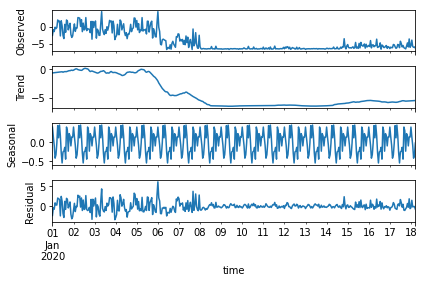

In [ ]:
res = sm.tsa.seasonal_decompose(x=de["V2"],extrapolate_trend='freq')
x=res.plot()

In [ ]:
dti = pd.date_range('2020-01-01', periods=414, freq='H')
de_test["time"]=dti
de_test.set_index('time', inplace=True)

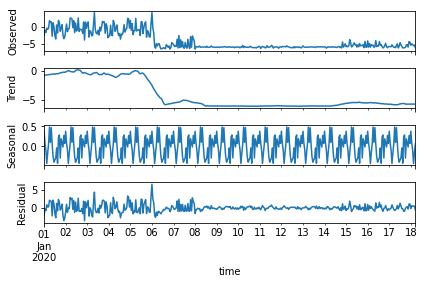

In [ ]:
res_test = sm.tsa.seasonal_decompose(x=de_test["V2"],extrapolate_trend='freq')
x=res_test.plot()

In [ ]:
res.resid

time
2020-01-01 00:00:00   -2.308542
2020-01-01 01:00:00   -0.431008
2020-01-01 02:00:00   -0.767723
2020-01-01 03:00:00    0.815483
2020-01-01 04:00:00    0.293208
                         ...   
2020-01-18 01:00:00    1.447656
2020-01-18 02:00:00   -0.196212
2020-01-18 03:00:00   -0.098759
2020-01-18 04:00:00   -0.096884
2020-01-18 05:00:00   -0.749947
Name: V2, Length: 414, dtype: float64

In [ ]:
res.seasonal

time
2020-01-01 00:00:00    0.395848
2020-01-01 01:00:00    0.141087
2020-01-01 02:00:00   -0.076958
2020-01-01 03:00:00   -0.417554
2020-01-01 04:00:00   -0.328874
                         ...   
2020-01-18 01:00:00    0.141087
2020-01-18 02:00:00   -0.076958
2020-01-18 03:00:00   -0.417554
2020-01-18 04:00:00   -0.328874
2020-01-18 05:00:00   -0.021812
Name: V2, Length: 414, dtype: float64

In [ ]:
res.trend

time
2020-01-01 00:00:00   -0.632043
2020-01-01 01:00:00   -0.613175
2020-01-01 02:00:00   -0.594308
2020-01-01 03:00:00   -0.575440
2020-01-01 04:00:00   -0.556572
                         ...   
2020-01-18 01:00:00   -5.508272
2020-01-18 02:00:00   -5.498743
2020-01-18 03:00:00   -5.489214
2020-01-18 04:00:00   -5.479686
2020-01-18 05:00:00   -5.470157
Name: V2, Length: 414, dtype: float64

In [ ]:
res_test.resid

time
2020-01-01 00:00:00   -2.033812
2020-01-01 01:00:00   -0.262756
2020-01-01 02:00:00   -0.754562
2020-01-01 03:00:00    0.856401
2020-01-01 04:00:00    0.241797
                         ...   
2020-01-18 01:00:00    0.565260
2020-01-18 02:00:00    0.505741
2020-01-18 03:00:00    0.498872
2020-01-18 04:00:00    0.468244
2020-01-18 05:00:00   -0.577828
Name: V2, Length: 414, dtype: float64

In [ ]:
res_test.trend

time
2020-01-01 00:00:00   -0.808171
2020-01-01 01:00:00   -0.785910
2020-01-01 02:00:00   -0.763649
2020-01-01 03:00:00   -0.741388
2020-01-01 04:00:00   -0.719127
                         ...   
2020-01-18 01:00:00   -5.669689
2020-01-18 02:00:00   -5.669127
2020-01-18 03:00:00   -5.668566
2020-01-18 04:00:00   -5.668004
2020-01-18 05:00:00   -5.667442
Name: V2, Length: 414, dtype: float64

In [ ]:
res_test.seasonal

time
2020-01-01 00:00:00    0.375964
2020-01-01 01:00:00    0.081504
2020-01-01 02:00:00   -0.093153
2020-01-01 03:00:00   -0.428595
2020-01-01 04:00:00   -0.168005
                         ...   
2020-01-18 01:00:00    0.081504
2020-01-18 02:00:00   -0.093153
2020-01-18 03:00:00   -0.428595
2020-01-18 04:00:00   -0.168005
2020-01-18 05:00:00    0.059195
Name: V2, Length: 414, dtype: float64

In [ ]:
seasonal_data=[]
for i in de.columns:
  res = sm.tsa.seasonal_decompose(x=de[i],extrapolate_trend='freq')
  de[i]=res.trend+res.resid
  seasonal_data.append(pd.DataFrame(data=res.resid))
#seasonal[0]["V3"]
seasonal_test=[]
for i in de_test.columns:
  res_test = sm.tsa.seasonal_decompose(x=de_test[i],extrapolate_trend='freq')
  de_test[i]=res_test.trend+res_test.resid
  seasonal_test.append(pd.DataFrame(data=res_test.resid))

In [ ]:
de.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,...,V922,V923,V924,V925,V926,V927,V928,V929,V930,V931,V932,V933,V934,V935,V936,V937,V938,V939,V940,V941,V942,V943,V944,V945,V946,V947,V948,V949,V950,V951,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,-2.940586,-2.950505,-2.916868,-2.930301,-2.882966,-2.956169,-2.884758,-2.960601,-2.983357,-3.018040,-3.013950,-2.964663,-2.988482,-2.947091,-2.945448,-2.840629,-2.831132,-2.788581,-2.762249,-2.726428,-2.728057,-2.713280,-2.702311,-2.682737,-2.666793,-2.659503,-2.648968,-2.644431,-2.685403,-2.799709,-2.882791,-2.961156,-2.981614,-3.002181,-2.979306,-2.938394,-2.926329,-2.914466,-2.879206,-2.857583,...,-0.122948,-0.072919,-0.026021,-0.045476,-0.060251,-0.080444,-0.080454,-0.116798,-0.132550,-0.106446,-0.089868,-0.085982,-0.100494,-0.091431,-0.137138,-0.152015,-0.123671,-0.109721,-0.079320,-0.022520,-0.018293,-0.030688,-0.023830,-0.037202,-0.062951,-0.051398,-0.033416,-0.012422,0.016565,-0.023329,-0.030835,-0.069081,-0.079072,-0.053751,-0.070151,-0.057485,-0.050491,-0.078497,-0.128176,-0.087380
2020-01-01 01:00:00,-1.044184,-1.046661,-1.097859,-1.088038,-1.165015,-1.183187,-1.245113,-1.244388,-1.135647,-1.065837,-1.071077,-1.059908,-0.973109,-0.929372,-0.993495,-1.044919,-1.093714,-1.077831,-1.079204,-1.020298,-1.023010,-1.024710,-1.019811,-1.014364,-0.963002,-1.016290,-1.045528,-1.023993,-1.053864,-1.085818,-1.181792,-1.208191,-1.164038,-1.148711,-1.105565,-1.110300,-1.074177,-1.086843,-1.050840,-1.082000,...,0.036424,0.053397,0.045189,0.039559,0.039888,0.031703,0.045873,0.028578,0.023793,0.018556,0.026094,0.025657,0.029877,0.027413,0.019777,0.031595,0.002737,0.021767,0.022682,0.056424,-0.000543,0.011369,-0.005893,-0.016946,-0.000245,0.003568,0.024149,-0.002697,0.005009,0.029565,0.020025,-0.003847,0.000420,-0.001163,0.024631,0.000291,0.033342,0.027634,0.001535,0.005879
2020-01-01 02:00:00,-1.362031,-1.379265,-1.321653,-1.291289,-1.244817,-1.154796,-1.128429,-1.190762,-1.230529,-1.366058,-1.463736,-1.555514,-1.606035,-1.590429,-1.572801,-1.550125,-1.531654,-1.516069,-1.513790,-1.538358,-1.511815,-1.515671,-1.499783,-1.502546,-1.411117,-1.316304,-1.266227,-1.273342,-1.266865,-1.290616,-1.304009,-1.341036,-1.383534,-1.460972,-1.534541,-1.632581,-1.696471,-1.710894,-1.658771,-1.639507,...,0.095514,0.059227,0.062749,0.072180,0.048741,0.029466,0.060626,0.049553,0.076359,0.056524,0.019845,-0.012912,-0.038160,-0.032617,-0.015780,-0.053725,-0.018412,-0.028793,0.023269,-0.020818,-0.045545,-0.001862,0.001799,0.036573,0.056365,0.071103,0.107531,0.090793,0.095104,0.083005,0.085173,0.065530,0.125927,0.013651,-0.000790,0.005368,-0.041647,-0.056091,-0.010496,-0.018747
2020-01-01 03:00:00,0.240043,0.211265,0.256329,0.308257,0.380328,0.405092,0.397781,0.353980,0.298594,0.276476,0.199496,0.120023,0.052870,-0.036031,-0.064082,-0.083662,-0.122929,-0.125887,-0.059105,0.019224,0.061640,0.123444,0.123206,0.226235,0.178847,0.241601,0.202673,0.272231,0.398889,0.400678,0.376515,0.341227,0.281490,0.330848,0.257439,0.219628,0.150544,0.081791,0.058077,0.093619,...,0.091645,0.106939,0.136763,0.124019,0.095496,0.064834,0.046543,0.053250,0.030888,0.023996,0.028770,0.010355,0.003697,-0.004450,0.059775,0.070552,0.054925,0.022330,0.045360,0.006197,0.060412,0.081106,0.112791,0.094309,0.053756,0.087842,0.068079,0.063780,0.033301,0.038086,0.001163,0.013890,0.020954,0.006535,0.034875,-0.001409,0.004325,-0.003780,0.061082,0.034859
2020-01-01 04:00:00,-0.263364,-0.237093,-0.247715,-0.182768,-0.212807,-0.205965,-0.278551,-0.302500,-0.465073,-0.589644,-0.686979,-0.806235,-0.864728,-0.830272,-0.804313,-0.765199,-0.732419,-0.649650,-0.599894,-0.550560,-0.449052,-0.382471,-0.356544,-0.290189,-0.321548,-0.249983,-0.282312,-0.325983,-0.333806,-0.368604,-0.404103,-0.392391,-0.485804,-0.581996,-0.692381,-0.725490,-0.761958,-

In [ ]:
de_test.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,-2.841984,-2.885119,-2.869599,-2.928200,-2.884461,-2.894206,-2.869736,-2.891608,-2.918637,-2.911711,-2.888052,-2.800194,-2.804062,-2.775961,-2.758399,-2.736602,-2.753813,-2.766941,-2.764800,-2.797664,-2.767957,-2.788121,-2.803050,-2.795029,-2.860598,-2.887758,-2.878869,-2.913970,-2.928788,-2.828760,-2.785237,-2.746097,-2.781103,-2.845939,-2.867465,-2.828879,-2.785849,-2.783170,-2.761922,-2.758968,-2.769414,-2.781169,-2.832607,-2.862850,-2.787310,-2.795188,-2.749338,-2.768042
2020-01-01 01:00:00,-1.048666,-1.093244,-1.095498,-1.129914,-1.137064,-1.129683,-1.172952,-1.180135,-1.163018,-1.133565,-1.081277,-1.042050,-1.037620,-1.027180,-0.962526,-0.933669,-0.984135,-0.966794,-0.943740,-0.967504,-0.954002,-1.028513,-1.062984,-1.038105,-1.114558,-1.188697,-1.177780,-1.241491,-1.238187,-1.246150,-1.261299,-1.254548,-1.147787,-1.109265,-1.082796,-1.058231,-1.027583,-0.995105,-0.963270,-0.984047,-0.970995,-0.992603,-0.926601,-0.914617,-0.938056,-1.036932,-0.999747,-0.999916
2020-01-01 02:00:00,-1.518211,-1.522501,-1.574378,-1.577524,-1.633636,-1.698919,-1.699995,-1.739029,-1.698340,-1.701489,-1.664379,-1.698879,-1.745714,-1.761075,-1.782644,-1.743527,-1.698350,-1.682373,-1.687858,-1.664265,-1.603638,-1.508042,-1.556560,-1.490597,-1.506472,-1.484200,-1.505355,-1.534619,-1.541709,-1.533214,-1.543515,-1.574317,-1.638395,-1.658195,-1.651034,-1.635719,-1.651029,-1.657472,-1.612246,-1.618356,-1.561386,-1.539091,-1.520704,-1.521515,-1.506182,-1.432150,-1.430255,-1.445223
2020-01-01 03:00:00,0.115013,0.071149,0.081004,0.005992,0.060770,0.060240,0.016317,-0.012014,-0.124526,-0.154029,-0.224998,-0.248870,-0.281890,-0.251966,-0.168025,-0.101491,-0.052872,0.008388,0.070898,0.072335,0.103565,0.121375,0.147338,0.232639,0.279808,0.260028,0.196743,0.222381,0.204510,0.246637,0.193778,0.105563,0.055570,-0.023603,-0.061167,-0.088747,-0.103608,-0.081400,0.004653,0.077401,0.125520,0.142094,0.207501,0.113465,0.146947,0.066760,0.035722,0.079240
2020-01-01 04:00:00,-0.477330,-0.441035,-0.485725,-0.557841,-0.578444,-0.737290,-0.790608,-0.855894,-0.863735,-0.937359,-0.979646,-0.967488,-0.962085,-0.913318,-0.862860,-0.756203,-0.705649,-0.601177,-0.520302,-0.456570,-0.456297,-0.515758,-0.450070,-0.534070,-0.514248,-0.556388,-0.582116,-0.610367,-0.658379,-0.767890,-0.799555,-0.855897,-0.924422,-0.967177,-0.978369,-1.008688,-1.038610,-1.018023,-0.999512,-0.926485,-0.866354,-0.769341,-0.685435,-0.687938,-0.581764,-0.610990,-0.564350,-0.626715


In [ ]:
print(len(seasonal_data))
print(len(seasonal_data[0]))
print(len(seasonal_test))
print(len(seasonal_test[0]))

960
414
48
414


In [ ]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

In [ ]:
p=[]
p_y=[]

In [ ]:
p, p_y = create_sequences(de["V2"], 3)
p=np.array(p)
p_y=np.array(p_y)
p=np.reshape(p,(-1,3))
p_y=np.reshape(p_y,(-1,1))
p = torch.from_numpy(p).float()
p_y = torch.from_numpy(p_y).float()

In [ ]:
print(p_y.shape)
p.shape

torch.Size([410, 1])


torch.Size([410, 3])

In [ ]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]

In [ ]:
seq_len=5
for i in de.columns:
  X_temp, y_temp = create_sequences(de[i], seq_len)
  X_train.append(X_temp)
  y_train.append(y_temp)
for i in de_test.columns:
  X_temp, y_temp = create_sequences(de[i], seq_len)
  X_test.append(X_temp)
  y_test.append(y_temp)

X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

X_train=np.reshape(X_train,(-1,seq_len))
y_train=np.reshape(y_train,(-1,seq_len))



In [ ]:
X_test=np.reshape(X_test,(-1,1))
y_test=np.reshape(y_test,(-1,1))

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test= torch.from_numpy(X_test).float()
y_test= torch.from_numpy(y_test).float()

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

torch.Size([391680, 5])
torch.Size([78336, 5])
torch.Size([97920, 1])
torch.Size([19584, 1])


In [ ]:
class Tdataset(Dataset):
  def __init__(self,X_train,y_train):
    self.X_train=X_train
    self.y_train=y_train
    self.n_samples=X_train.shape[0]
  def __getitem__(self,index):
    return self.X_train[index], self.y_train[index]
  def __len__(self):
    return self.n_samples

In [ ]:
dataset1=Tdataset(p,p_y)
dataloader = DataLoader(dataset=dataset1,batch_size=1,num_workers=3)

In [ ]:
dataset=Tdataset(X_train,y_train)
dataloader = DataLoader(dataset=dataset,batch_size=412,num_workers=3)

In [ ]:
class LSTMpred(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(LSTMpred, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.3
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

In [ ]:
def train_model(
  model, 
  inputs,
  labels, 
  test_data=None, 
  test_labels=None
):
  total_samples=len(dataloader)
  n_iterations = math.ceil(total_samples/1)
  
  loss_fn = torch.nn.SmoothL1Loss()
  sum=0
  optimiser = torch.optim.Adam(model.parameters(), lr=0.01,weight_decay=1e-4)
  num_epochs = 500
  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
      sum=0
    #for i,(inputs,labels) in enumerate(dataloader):
      model.reset_hidden_state()

      y_pred = model(inputs)

      loss = loss_fn(y_pred.float(), labels)
      #loss=torch.sqrt(loss_fn(torch.log(y_pred.float() + 1), torch.log(y_train.float() + 1)))
      #if test_data is not None:
      #  with torch.no_grad():
        #  y_test_pred = model(X_test)
       #   test_loss = loss_fn(y_test_pred.float(), y_test)
        
        #test_hist[t] = test_loss.item()
    
      #if t % 10 == 0:  
          #print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    
      #elif t % 10 == 0:
      print(f'Epoch {t+1}/{num_epochs} train loss: {loss.item()} ')
      #sum=sum+loss.item()
    
      optimiser.zero_grad()

      loss.backward()

      optimiser.step()
      train_hist[t] = loss.item()
      #print("Overall loss",sum/n_iterations)
  return model.eval(), train_hist, test_hist

In [ ]:
model= LSTMpred(1,50,3,n_layers=3)

In [ ]:
model,train_hist,test_hist=train_model(model,p,p_y)

Epoch 1/500 train loss: 4.012299060821533 
Epoch 2/500 train loss: 3.810413122177124 
Epoch 3/500 train loss: 3.344087600708008 
Epoch 4/500 train loss: 2.7391812801361084 
Epoch 5/500 train loss: 2.3292360305786133 
Epoch 6/500 train loss: 2.0149545669555664 
Epoch 7/500 train loss: 1.8019309043884277 
Epoch 8/500 train loss: 1.6852309703826904 
Epoch 9/500 train loss: 1.688520908355713 
Epoch 10/500 train loss: 1.767608880996704 
Epoch 11/500 train loss: 1.8087571859359741 
Epoch 12/500 train loss: 1.7941230535507202 
Epoch 13/500 train loss: 1.752469539642334 
Epoch 14/500 train loss: 1.7085630893707275 
Epoch 15/500 train loss: 1.679683804512024 
Epoch 16/500 train loss: 1.671020269393921 
Epoch 17/500 train loss: 1.6782255172729492 
Epoch 18/500 train loss: 1.6926136016845703 
Epoch 19/500 train loss: 1.7061505317687988 
Epoch 20/500 train loss: 1.71418297290802 
Epoch 21/500 train loss: 1.7151826620101929 
Epoch 22/500 train loss: 1.7099025249481201 
Epoch 23/500 train loss: 1.69

In [ ]:
train_hist

In [ ]:
plt.plot(train_hist, label="Training loss")
plt.ylim((0,1))
plt.plot()

In [ ]:
with torch.no_grad():
  y_test_pred = model(p)

In [ ]:
y_test_pred.shape

In [ ]:
p_y[1]

In [ ]:
y_test_pred[1]

In [ ]:
plt.plot(p_y)

In [ ]:
plt.plot(y_test_pred)